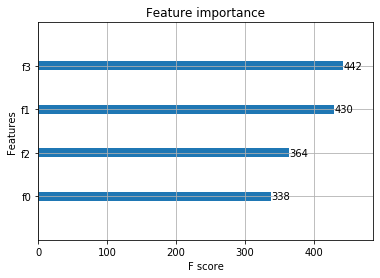

오차 행렬

[[11  0  0]
 [ 0 13  0]
 [ 0  0 14]]
1.0


In [25]:
from numpy import loadtxt
from numpy import genfromtxt
import pandas as pd
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,roc_auc_score,confusion_matrix
from sklearn.model_selection import train_test_split

# x = genfromtxt('train_data.csv', delimiter=',')
# y = genfromtxt('train_target.csv', delimiter=',')

# X, Y = x[1:,3:46], y[1:,2]

csv = pd.read_csv('iris.csv')
x = csv.iloc[:,1:5]
y = csv.iloc[:,5]
train_data, test_data, train_label, test_label = train_test_split(x,y)


def eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
#     precision = precision_score(y_test,pred,average='weighted')
#     recall = recall_score(y_test, pred)
#     f1 = f1_score(y_test, pred)
#     roc_score = roc_auc_score(y_test, pred)
    print("오차 행렬\n")
    print(confusion)
#     print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, f1-score : {3:.4f}, auc값: {4:.4f}'
#           .format(accuracy,precision,recall,f1,roc_score))
    print(accuracy)
    
model = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
# evals = [(X_test, y _test)] evals 데이터셋 다시설정하기.(overfitting)
model.fit(train_data.values,train_label.values) #, early_stopping_rounds = 100, eval_metric = "logloss", eval_set = evals, verbose = True
pred = model.predict(test_data.values)

# # dtrain = xgb.DMatrix(X_train, label=y_train)
# # dtest = xgb.DMatrix(X_test, label=y_test)
# # param = {'max_depth': 3, 'eta': 0.3,'silent': 1,
# #          'objective': 'multi:softprob','num_class':5}
# # num_round = 20
# # bst = xgb.train(param, dtrain, num_round)
# # preds = bst.predict(dtest)
# # accuracy = accuracy_score(y_test, preds)
# # print(accuracy)
# #feature importance요

plot_importance(model)
pyplot.show()
eval(test_label.values,pred)